Data Analysis on Suicide Rates Overview from 1985 to 2016*
Link to Data:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


In [3]:
#Load Require Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import gc

In [4]:
#Load Sucide Rate Dataset
df=pd.read_csv(r'C:\Users\Ebere Ukonu\Downloads\master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


EXPLORATORY DATA ANALYSIS

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
df.shape

(27820, 12)

In [11]:
features= [c for c in df.columns if c not in ['population','suicides_no']]
Suicide_df=df[features]
Suicide_df.head()

,country,year,sex,age,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [54]:
df['age'].unique()


array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [55]:
df['generation'].unique()


array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

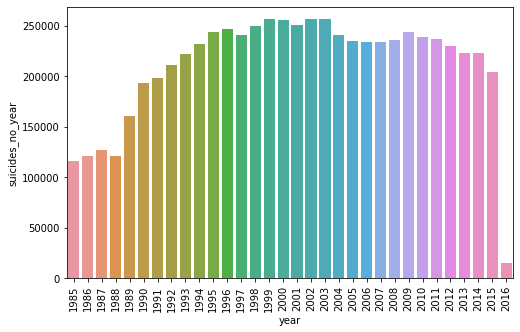

In [31]:
suicides_no_year = []

for y in df['year'].unique():
    suicides_no_year.append(sum(df[df['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sb.barplot(x = top_year, y = top_suicides)

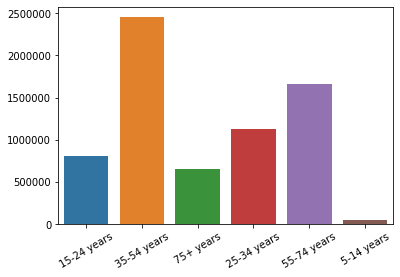

In [33]:
suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sb.barplot(x = df['age'].unique(), y = suicides_no_age)

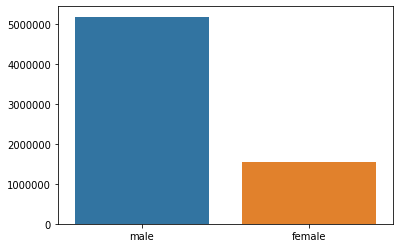

In [34]:
suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df[df['sex'] == s]['suicides_no']))

sb.barplot(x = df['sex'].unique(), y = suicides_no_sex)

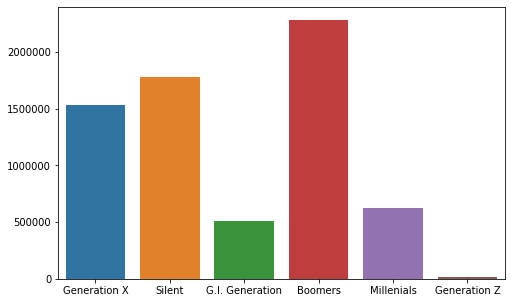

In [43]:
suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df[df['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sb.barplot(x = df['generation'].unique(), y = suicides_no_gen)

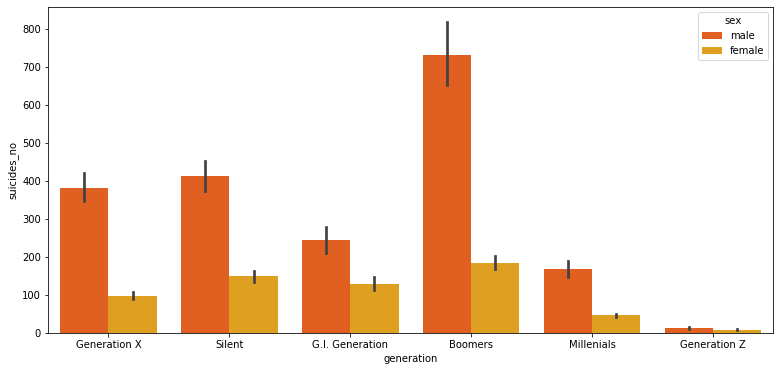

In [7]:
## Suicides number by generation and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sb.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')

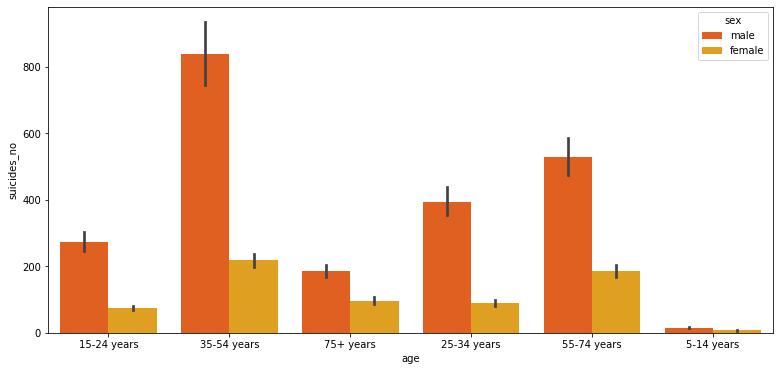

In [20]:
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sb.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')

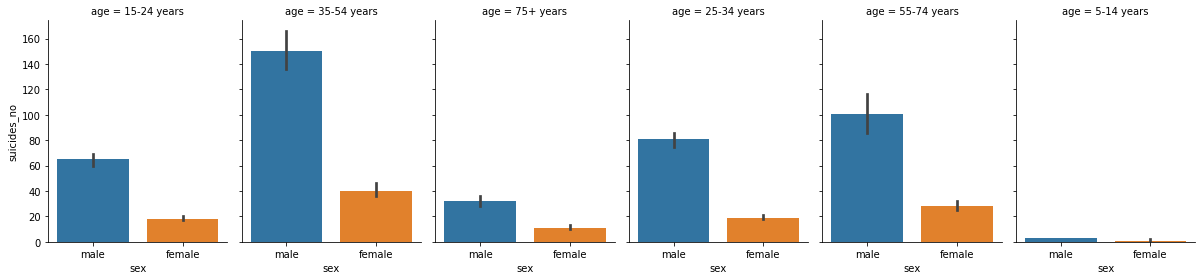

In [35]:
sb.catplot(x='sex', y='suicides_no',col='age', data=df, estimator=np.median,height=4, aspect=.7,kind='bar')

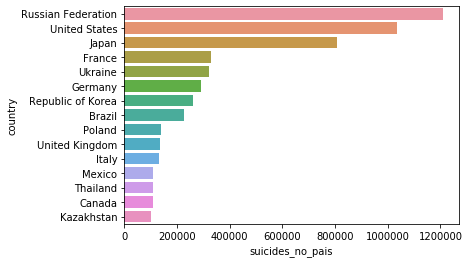

In [36]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides_no']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sb.barplot(x = top_suicides, y = top_paises)

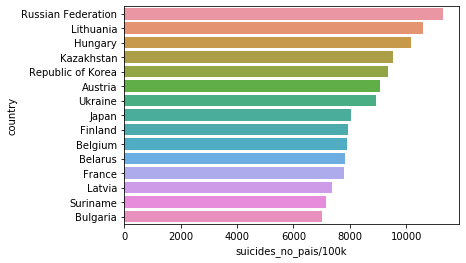

In [38]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais/100k'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['suicides_no_pais/100k'][:quant]
sb.barplot(x = top_suicides, y = top_paises)

In [52]:
sb.scatterplot(x = 'gdp_for_year ($)', y = 'suicides_no', data = df)

ValueError: Could not interpret input 'gdp_for_year ($)'

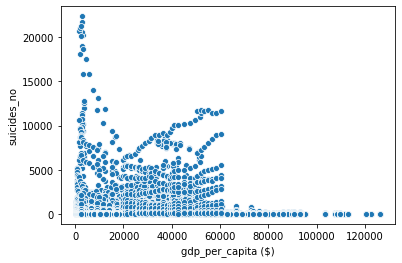

In [50]:
sb.scatterplot(x = 'gdp_per_capita ($)', y = 'suicides_no', data = df)

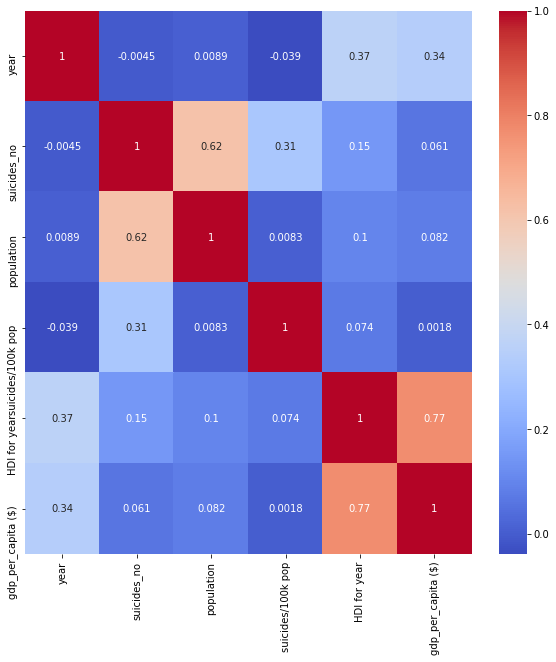

In [8]:
## Correlation of features
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sb.heatmap(df.corr(),annot=True, cmap='coolwarm')

**Group Suicides Rates Per 100K Population (Suicides/100kpop) With Age and Cuntries**

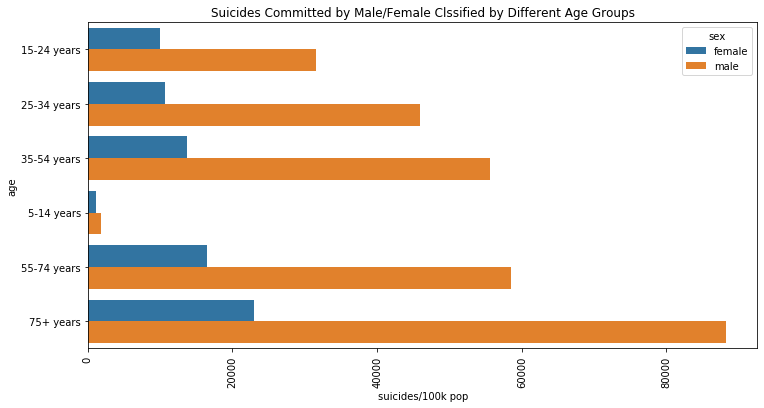

In [9]:
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(df.groupby(['age','sex'],sort=True)['suicides/100k pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides/100k pop','age'], ascending=False)
plot1.reset_index()
g = sb.barplot(x='suicides/100k pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title('Suicides Committed by Male/Female Clssified by Different Age Groups');

Inference from the plot above indicated that suicide rate is significantly higher for Male sex group when compared to female

**Group Suicides Committed by Countries Over the years**

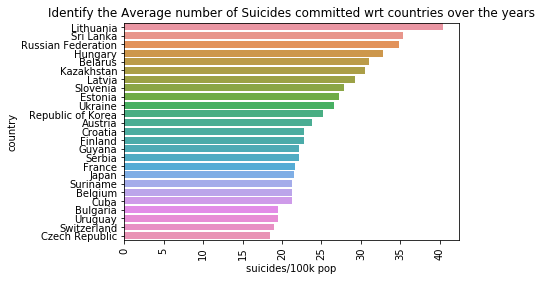

In [39]:
suicide_ctry = pd.DataFrame(df.groupby(['country'])['suicides/100k pop'].mean()).reset_index()
plot2 = suicide_ctry.sort_values(by=['suicides/100k pop','country'], ascending=False).head(25)
plot2.reset_index()
g = sb.barplot(x='suicides/100k pop', y='country', data=plot2);
plt.xticks(rotation=90)
plt.title('Identify the Average number of Suicides committed wrt countries over the years');

**Suicides by Countries GDP - Does Economy of a Country act as a Factor?**

In [27]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [28]:
num_pipeline = Pipeline([
       ("selector", DataFrameSelector(['gdp_per_capita ($)','suicides/100k pop'])),
       ('min_max_scaler', MinMaxScaler()),
     ])

no_pipeline = Pipeline([
        ("selector", DataFrameSelector(["country","year"]))
    ])

In [29]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("no_pipeline", no_pipeline),
    ])

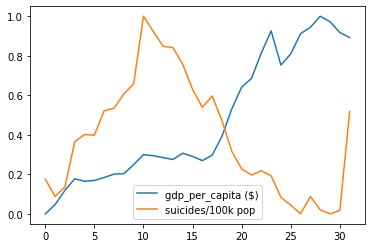

In [30]:
NewData_plot3 = df.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],['year'], aggfunc='mean')

Scaled_Data = full_pipeline.fit_transform(NewData_plot3)
NewData_Scaled_Data = pd.DataFrame(Scaled_Data)

NewData_Scaled_Data.columns  = ['gdp_per_capita ($)','suicides/100k pop']
NewData_Scaled_Data.plot()

Inference from the lineplot above indicated that a higher GDP  would led to lower Suicidal Rate and vica versa.